In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [38]:
p18 = pd.read_csv('players_18.csv', encoding='latin-1') #players_18.csv file, some of the cases we encoded in latin1
p19 = pd.read_csv('players_19.csv', encoding='latin-1') #players_19.csv file, some of the cases we encoded in latin1
m_results = pd.read_csv('match_result.csv', encoding='latin-1') #match_results.csv file, some of the cases we encoded in latin1

In [39]:
#dropping unneeded variables from the player_18 and player_19 csv files first

#list of variables of interest (voi) that we want to keep for our models
voi_player = ['short_name', 'age', 'height_cm', 'weight_kg', 'club', 'wage_eur', 'player_positions',
      'pace' ,'shooting', 'passing', 'dribbling', 'defending', 'physic']

columns_list_18 = p18.columns.values.tolist() #list of all columns
columns_list_19 = p19.columns.values.tolist()

for i in range(len(columns_list_18)): #iterate through list of columns
    if columns_list_18[i] not in voi_player: #if column is not in our variables of interest list
        p18.pop(columns_list_18[i]) #remove it from the df
        
for i in range(len(columns_list_19)):
    if columns_list_19[i] not in voi_player:
        p19.pop(columns_list_19[i])

In [40]:
p18['short_name'] = p18['short_name'].astype('category') #setting to correct variable types
p18['club'] = p18['club'].astype('category') #setting to correct variable types
p19['short_name'] = p19['short_name'].astype('category') #setting to correct variable types
p19['club'] = p19['club'].astype('category') #setting to correct variable types

In [41]:
p18.columns #confirming we cut out the 87 unneeded columns

Index(['short_name', 'age', 'height_cm', 'weight_kg', 'club', 'wage_eur',
       'pace', 'shooting', 'passing', 'dribbling', 'defending'],
      dtype='object')

In [42]:
p18.head()

,short_name,age,height_cm,weight_kg,club,wage_eur,pace,shooting,passing,dribbling,defending
0,Cristiano Ronaldo,32,185,80,Real Madrid,565000,90.0,93.0,82.0,90.0,33.0
1,L. Messi,30,170,72,FC Barcelona,565000,89.0,90.0,86.0,96.0,26.0
2,Neymar,25,175,68,Paris Saint-Germain,280000,92.0,84.0,79.0,95.0,30.0
3,M. Neuer,31,193,92,FC Bayern Munich,230000,NaN,NaN,NaN,NaN,NaN
4,L. SuÃÂ¡rez,30,182,86,FC Barcelona,510000,82.0,90.0,79.0,87.0,42.0


In [43]:
#dropping unneeded variables from the match_results csv

#list of variables of interest (voi) that we want to keep for our models
voi_match = ['FTHG', 'FTAG', 'FTR', 'HomeTeam', 'AwayTeam']

columns_list_match = m_results.columns.values.tolist()

for i in range(len(columns_list_match)): #iterate through list of columns
    if columns_list_match[i] not in voi_match: #if column is not in our variables of interest list
        m_results.pop(columns_list_match[i]) #remove it from the df

In [44]:
m_results.shape

(2984, 5)

In [45]:
m_results.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,Standard de Liège,KAA Gent,3,2,H
1,KV Kortrijk,RSC Anderlecht,1,4,A
2,KV Oostende,Royal Excel Mouscron,2,1,H
3,Sint-Truidense VV,KSV Cercle Brugge,0,0,D
4,SV Zulte-Waregem,Waasland-Beveren,2,2,D


In [46]:
m_results['HomeTeam'] = m_results['HomeTeam'].astype('category') #setting to correct variable types
m_results['AwayTeam'] = m_results['AwayTeam'].astype('category')
m_results['FTR'] = m_results['FTR'].astype('category')

In [47]:
p18.to_csv('players_18_1.csv') #save players_18 dataframe as the new csv file
p19.to_csv('players_19_1.csv') #save players_19 dataframe as the new csv file
m_results.to_csv('match_result_1.csv') #save match_results dataframe as the new csv file

In [48]:
#for principal component analysis
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

In [55]:
p18_slim = pd.read_csv('players_18_1.csv').dropna()
p19_slim = pd.read_csv('players_19_1.csv').dropna()
p18_slim.head()

,Unnamed: 0,short_name,age,height_cm,weight_kg,club,wage_eur,pace,shooting,passing,dribbling,defending
0,0,Cristiano Ronaldo,32,185,80,Real Madrid,565000,90.0,93.0,82.0,90.0,33.0
1,1,L. Messi,30,170,72,FC Barcelona,565000,89.0,90.0,86.0,96.0,26.0
2,2,Neymar,25,175,68,Paris Saint-Germain,280000,92.0,84.0,79.0,95.0,30.0
4,4,L. SuÃÂ¡rez,30,182,86,FC Barcelona,510000,82.0,90.0,79.0,87.0,42.0
5,5,R. Lewandowski,28,185,79,FC Bayern Munich,355000,81.0,88.0,75.0,86.0,38.0


In [56]:
x_18 = p18_slim[['age', 'height_cm', 'weight_kg', 'pace', 'shooting', 'passing', 'dribbling', 'defending']]
y_18 = p18_slim['wage_eur']

x_19 = p19_slim[['age', 'height_cm', 'weight_kg', 'pace', 'shooting', 'passing', 'dribbling', 'defending']]
y_19 = p19_slim['wage_eur']

In [57]:
x_train_18, x_test_18 , y_train_18, y_test_18 = train_test_split(x_18, y_18, test_size=0.3, random_state=1)
x_train_19, x_test_19 , y_train_19, y_test_19 = train_test_split(x_19, y_19, test_size=0.3, random_state=1)

In [58]:
scaler_18 = StandardScaler().fit(x_train_18)
scaler_19 = StandardScaler().fit(x_train_19)

x_train_sc_18 = scaler_18.transform(x_train_18)
x_train_sc_19 = scaler_19.transform(x_train_19)

In [59]:
pca_18 = PCA()
pca_19 = PCA()

x_reduced_18 = pca_18.fit_transform(x_train_sc_18)
x_reduced_19 = pca_19.fit_transform(x_train_sc_19)

In [60]:
np.cumsum(np.round(pca_18.explained_variance_ratio_, decimals=2)) #cumulative variance explained in p18 dataset

array([0.42, 0.64, 0.79, 0.88, 0.94, 0.97, 0.99, 1.  ])

In [61]:
np.cumsum(np.round(pca_19.explained_variance_ratio_, decimals=2)) #cumulative variance explained in p19 dataset

array([0.41, 0.64, 0.78, 0.87, 0.93, 0.96, 0.98, 0.99])

In [62]:
kfold_cv = KFold(n_splits=10, shuffle=True, random_state=1)

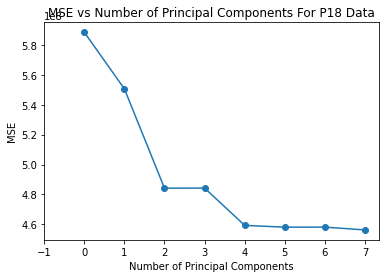

In [63]:
#MSE testing for p18 data

pca_fit_18 = pca_18.fit(x_train_sc_18) 
x_reduced_train_18 = pca_fit_18.transform(x_train_sc_18)
n_18 = len(x_reduced_train_18)

lr_18 = LinearRegression()
mse_18 = []

score_18 = -cross_val_score(lr_18, np.ones((n_18,1)), y_train_18, cv=kfold_cv, scoring='neg_mean_squared_error').mean()
mse_18.append(score_18)

for i in np.arange(1, 8):
    score_18 = -1*cross_val_score(lr_18, x_reduced_train_18[:,:i], y_train_18.ravel(), cv=kfold_cv, scoring='neg_mean_squared_error').mean()
    mse_18.append(score_18)
    
plt.plot(np.array(mse_18), '-o')
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('MSE vs Number of Principal Components For P18 Data')
plt.xlim(xmin=-1);

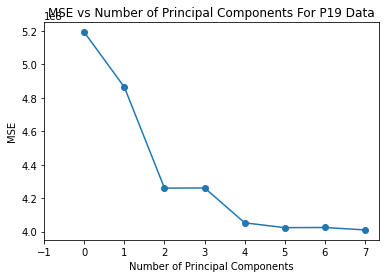

In [64]:
#MSE testing for p19 data

pca_fit_19 = pca_19.fit(x_train_sc_19) 
x_reduced_train_19 = pca_fit_19.transform(x_train_sc_19)
n_19 = len(x_reduced_train_19)

lr_19 = LinearRegression()
mse_19 = []

score_19 = -cross_val_score(lr_19, np.ones((n_19,1)), y_train_19, cv=kfold_cv, scoring='neg_mean_squared_error').mean()
mse_19.append(score_19)

for i in np.arange(1, 8):
    score_19 = -1*cross_val_score(lr_19, x_reduced_train_19[:,:i], y_train_19.ravel(), cv=kfold_cv, scoring='neg_mean_squared_error').mean()
    mse_19.append(score_19)
    
plt.plot(np.array(mse_19), '-o')
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('MSE vs Number of Principal Components For P19 Data')
plt.xlim(xmin=-1);

In [65]:
#using principal components with lowest MSE for p18 data set

p_18_pc_num = np.argmin(mse_18)+1 #returns the correct index for the principal component number with lowest MSE

x_test_sc_18 = scaler_18.transform(x_test_18)

lr_18.fit(x_reduced_train_18[:,:p_18_pc_num], y_train_18)

x_reduced_test_18 = pca_fit_18.transform(x_test_sc_18) 
pred_18 = lr_18.predict(x_reduced_test_18[:,:p_18_pc_num])
mse_18_1 = mean_squared_error(y_test_18, pred_18)

print("Test MSE: "+str(mse_18_1))

Test MSE: 396548728.59958273


In [66]:
#using principal components with lowest MSE for p19 dataset

p_19_pc_num = np.argmin(mse_19)+1 #returns the correct index for the principal component number with lowest MSE

x_test_sc_19 = scaler_19.transform(x_test_19)

lr_19.fit(x_reduced_train_19[:,:p_19_pc_num], y_train_19)

x_reduced_test_19 = pca_fit_19.transform(x_test_sc_19) 
pred_19 = lr_19.predict(x_reduced_test_19[:,:p_19_pc_num])
mse_19_1 = mean_squared_error(y_test_19, pred_19)

print("Test MSE: "+str(mse_19_1))

Test MSE: 416219936.52742666
